# Sheet 6

## 1 Autoencoders: theory and practice

   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/203.0 MB 7.4 MB/s eta 0:00:28
    --------------------------------------- 2.6/203.0 MB 6.3 MB/s eta 0:00:32
    --------------------------------------- 3.9/203.0 MB 6.7 MB/s eta 0:00:30
   - -------------------------------------- 5.5/203.0 MB 6.8 MB/s eta 0:00:29
   - -------------------------------------- 6.8/203.0 MB 6.7 MB/s eta 0:00:30
   - -------------------------------------- 7.9/203.0 MB 6.5 MB/s eta 0:00:31
   - -------------------------------------- 9.4/203.0 MB 6.5 MB/s eta 0:00:30
   -- ------------------------------------- 11.0/203.0 MB 6.6 MB/s eta 0:00:30
   -- ------------------------------------- 12.8/203.0 MB 6.8 MB/s eta 0:00:28
   -- ------------------------------------- 14.9/203.0 MB 7.1 MB/s eta 0:00:27
   --- ------------------------------------ 16.8/203.0 MB 7.2 MB/s eta 0:00:26
   --- ------------------------------------ 18.1/203.0 MB 7.2 MB/s 

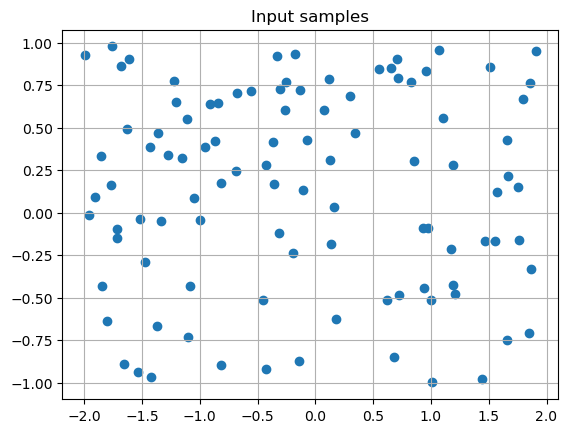

In [4]:
import torch
import matplotlib.pyplot as plt

# create 1000 uniform samples from a rectangle [-2, 2] x [-1, 1]
num_samples = 100
data = torch.zeros(num_samples, 2)
data[:, 0] = torch.rand(num_samples) * 4 - 2
data[:, 1] = torch.rand(num_samples) * 2 - 1

# plot the samples
plt.scatter(data[:, 0], data[:, 1])
plt.title("Input samples")
plt.grid(True)
plt.show()

In [6]:
from torch.utils.data import DataLoader, TensorDataset

# Prepare data loader
dataset = TensorDataset(data, data)
data_loader = DataLoader(dataset, batch_size=8, shuffle=True, drop_last=True)

# get batched data from the data loader
x, y = next(iter(data_loader))
print(x,y)
print("x.shape:", x.shape)
print("y.shape:", y.shape)
print("all x == y:", torch.all(x == y).item())

tensor([[-1.7160, -0.0936],
        [-1.5346, -0.9403],
        [ 1.5569, -0.1678],
        [-1.1106,  0.5513],
        [-0.3638,  0.4173],
        [ 1.7990,  0.6699],
        [-0.5531,  0.7153],
        [-0.8188, -0.8984]]) tensor([[-1.7160, -0.0936],
        [-1.5346, -0.9403],
        [ 1.5569, -0.1678],
        [-1.1106,  0.5513],
        [-0.3638,  0.4173],
        [ 1.7990,  0.6699],
        [-0.5531,  0.7153],
        [-0.8188, -0.8984]])
x.shape: torch.Size([8, 2])
y.shape: torch.Size([8, 2])
all x == y: True


In [ ]:
# TODO: define the Autoencoder architecture

import torch
from torch import nn
import pytorch_lightning as pl

class Autoencoder(nn.Module):
    def __init__(self, hidded_channels, latent_dim=1, input_dim=2):
        super().__init__()
        self.encoder1 = nn.Linear(2, 20)  # Input to Hidden
        self.encoder2 = nn.Linear(20, 10)  # Hidden
        self.encoder3 = nn.Linear(10, 1)  # Hidden
        self.decoder1 = nn.Linear(1, 10)  # Hidden
        self.decoder2 = nn.Linear(10,20)       # Activation
        self.decoder3 = nn.Linear(20, 2)  # Hidden to Output
        self.relu = nn.ReLU()

    def encoder(self, x):
        x = self.encoder1(x)
        x = self.relu(x)
        x = self.encoder2(x)
        x = self.relu(x)
        x = self.encoder3(x)
        return x
    
    def decoder(self, x):
        x = self.decoder1(x)
        x = self.relu(x)
        x = self.decoder2(x)
        x = self.relu(x)
        x = self.decoder3(x)
        return x

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


class AutoencoderModule(pl.LightningModule):
    def __init__(self, **model_kwargs):
        super().__init__()
        self.autoencoder = Autoencoder(**model_kwargs)
        self.loss_curve = []

    def forward(self, x):
        return self.autoencoder(x)

    def configure_optimizers(self):
        # as default use Adam optimizer:
        optimizer = torch.optim.Adam(self.parameters())

        return optimizer
    
    def on_train_start(self):
        self.loss_curve = []
        return super().on_train_start()

    def training_step(self, batch):
        x, _ = batch
        x_hat = self.autoencoder(x)
        loss = nn.MSELoss()(x_hat, x)
        self.loss_curve.append(loss.item())
        return loss

In [ ]:
# start the training using a PyTorch Lightning Trainer
trainer = pl.Trainer(max_epochs=1000)

autoencoder_module = AutoencoderModule()  # TODO: specify the model here
print("Model overview:", autoencoder_module)

trainer.fit(autoencoder_module, data_loader)